In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['class.csv', 'zoo.csv']


In [2]:
dataset = pd.read_csv('../input/zoo.csv')
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
# Check if data has any null or missing values
dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [5]:
# Print different animals in the dataset with their counts
dataset['animal_name'].value_counts()

frog        2
octopus     1
toad        1
pitviper    1
polecat     1
girl        1
swan        1
termite     1
chub        1
pussycat    1
skimmer     1
ostrich     1
clam        1
carp        1
vulture     1
mongoose    1
giraffe     1
catfish     1
piranha     1
vampire     1
scorpion    1
dogfish     1
worm        1
mole        1
slowworm    1
pheasant    1
bass        1
reindeer    1
flea        1
herring     1
           ..
vole        1
sealion     1
boar        1
kiwi        1
cavy        1
starfish    1
haddock     1
penguin     1
seahorse    1
sole        1
hamster     1
puma        1
tuna        1
mink        1
raccoon     1
newt        1
cheetah     1
dolphin     1
tuatara     1
lion        1
bear        1
antelope    1
seasnake    1
squirrel    1
tortoise    1
seawasp     1
gorilla     1
fruitbat    1
slug        1
crab        1
Name: animal_name, Length: 100, dtype: int64

In [6]:
dataset['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [7]:
#sns.pairplot(dataset)

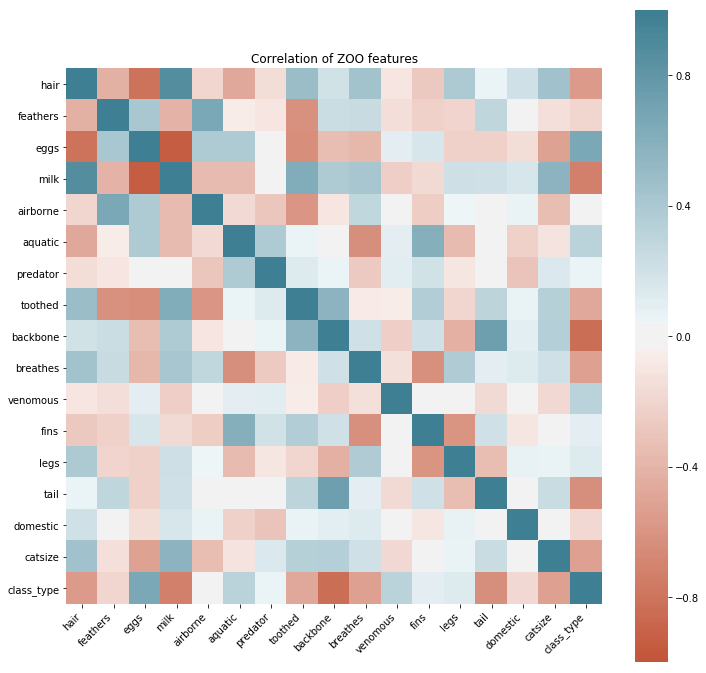

In [8]:
corr = dataset.corr()
plt.figure(figsize=(12,12))
plt.title("Correlation of ZOO features")
ax = sns.heatmap( corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45,horizontalalignment='right');

In [9]:
X_dataset = dataset.drop('class_type', axis=1)
X_dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [10]:
y_dataset = dataset.iloc[:,-1:]
y_dataset.head()

,class_type
0,1
1,1
2,4
3,1
4,1


In [11]:
print("X dataset shape: ", X_dataset.shape)
print("y dataset shape: ", y_dataset.shape)

X dataset shape:  (101, 17)
y dataset shape:  (101, 1)


In [12]:
# Split the dataset into training and testing dataset
train_x, test_x, train_y, test_y = train_test_split(X_dataset, y_dataset, test_size=0.3, random_state=42)
test_name = test_x['animal_name']

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 17)
Testing Data has (31, 17)


In [13]:
train_name = train_x['animal_name']
test_name = test_x['animal_name']

train_x = train_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


The MODEL

In [14]:
input_X  = tf.placeholder(tf.float32, shape=[None,16], name="input_X") 
input_y = tf.placeholder(tf.int32, shape=[None,1], name="input_y")

In [15]:
y_one_hot = tf.one_hot(input_y, 7)  # one hot encoding
y_one_hot = tf.reshape(y_one_hot, [-1, 7])

In [16]:
W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight')
b = tf.Variable(tf.random_normal([7],seed=0), name='bias')

In [17]:
logits = tf.matmul(input_X, W)+b

hypothesis = tf.nn.softmax(logits) #probas
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot), name="cost") #loss

train = tf.train.AdamOptimizer(0.01).minimize(cost) #step


In [18]:
prediction = tf.argmax(hypothesis, 1) #classes
correct_prediction = tf.equal(prediction, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict={input_X: train_x, input_y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={input_X: train_x, input_y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={input_X: train_x, input_y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={input_X: test_x, input_y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 3.516	Acc: 27.14%
Step:  1000	Loss: 0.025	Acc: 91.43%
Step:  2000	Loss: 0.017	Acc: 91.43%
Step:  3000	Loss: 0.014	Acc: 91.43%
Step:  4000	Loss: 0.012	Acc: 91.43%
Step:  5000	Loss: 0.011	Acc: 91.43%
Model Prediction = 0.9142857
Test Prediction = 0.87096775


In [20]:
submission = pd.DataFrame({
        "animal_name": test_name,
        "type": test_predict
    })

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,animal_name,type
0,squirrel,1
1,oryx,1
2,porpoise,1
3,puma,1
4,lion,1
